In [4]:
#!/bin/python3

#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################


import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [5]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'Mar' : {
        'vmin' : 180, 
        'vmax' : 1800},
    'Sep' : {
        'vmin' : 18, 
        'vmax' : 180},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'viridis_r',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}


In [6]:
#########################
######### FUNCTIONS DEFINITION 
#########################

def Plot_TimeSeries(data_set, lat, lon, color=None, marker=None):
    data_set.plot.line()
    
    
def Maps_Plots(data_set, regi, ax, month, date, dic):
    x_n, y_n = Grid(data_set)
    var = data_set[date]
    
    vmin = Range_MLD[month]['vmin']
    vmax = Range_MLD[month]['vmax']
    
    ax.set_global()
    ax.coastlines('50m')
    ax.set_xticks([-90, -60, -30, 0, 30, 60], crs=ccrs.PlateCarree())
    ax.set_yticks([10, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.set_extent(regi, crs=ccrs.PlateCarree())     #lat, lon
    ax.contourf(x_n, y_n, var, levels=np.linspace(vmin,vmax,100), cmap=dic['cmap'])
    
    contr = ax.contourf(x_n, y_n, var, levels=np.linspace(vmin,vmax,100), cmap=dic['cmap'])
    return(contr)


def Params(dic, var):
    if(dic['cmap']==None):
        dic['cmap'] = 'viridis'
        
    if(dic['orientation']==None):
        dic['orientation'] = 'vertical'
    
    if(dic['title_cbr']==None):
        dic['title_cbr'] = str(var.long_name)
    return(dic)


def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


def Axes_sel(Ncols, axs, i, j):
    if (Ncols == 1):
            ax = axs[i]
    else:
            ax = axs[i,j]
    return(ax)


#def Range(data_set):
 #   mini = data_set.min()
  #  maxi = data_set.max()
   # return(mini, maxi)

In [7]:
def Plots_Series(data, dates, region, Nrows, Ncols, proj, bar):
    month_names, year, day = Times(data)
    
    
    fig, axs = plt.subplots(nrows=Nrows, ncols=Ncols, subplot_kw=dict(projection=proj), 
                        figsize=(15, 7.5))

    for i, dat in enumerate(dates):
        for j in range(Ncols):
            ax = Axes_sel(Ncols, axs, i, j)
        
            contr = Maps_Plots(data, region, ax, month_names[dat], dat, bar)
            ax.set_title(day[dat] + '-' + month_names[dat] + '-' + year[dat])
            cb0 = fig.colorbar(contr, ax=ax, orientation=bar['orientation'])
            cb0.set_label(bar['title_cbr'])
    
    name_fig = 'MLD_' + year[dat] + '.pdf'
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    fig.savefig(name_fig, bbox_inches='tight')
    #plt.show()

    
def Times(data):
    dat = data.time.values
    dat = pandas.to_datetime(dat, format='%y')
    month = dat.strftime('%b')
    year = dat.strftime('%Y')
    day =  dat.strftime('%d')
    
    return(month, year, day)

In [8]:
#########################
### ######### OPENING FILES AND DIRECTORIES
#########################

dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'

fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
c_isas = xr.open_dataset(dir_2 + fl_n2, autoclose=True)

mld_i = c_isas.MLDP
mld_a = c_armor.mlotst

yrs = [i for i in range(2005,2006,1)]

##Projection and region to plot
projection = ccrs.PlateCarree(360)
region = [-90, 50, 10, 85]    #Lon, Lat



In [9]:
ys = [2005, 2006, 2011, 2016, 2017]

for year in ys:

    months = [4,8]
    Nrows = len(months)
    Ncols = 1

    print(year)
    f = str(year)
    d_set = xr.open_dataset(dir_1 + fl_n1 + f + ext, autoclose=True)
    mld = d_set.mlotst

    Plots_Series(mld, months, region, Nrows, Ncols, projection, color_bar)

2005


NameError: name 'directory' is not defined

2007


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


2008


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


2012


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


2013


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


2014


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


2018


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


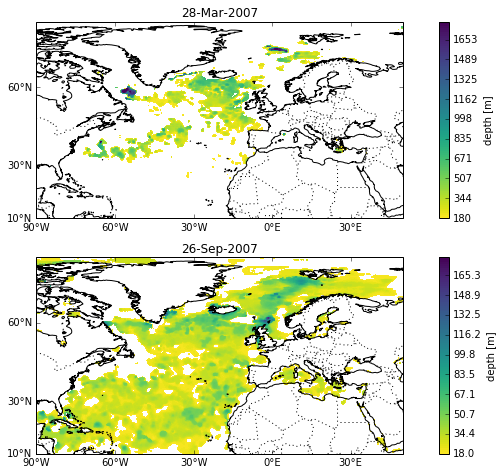

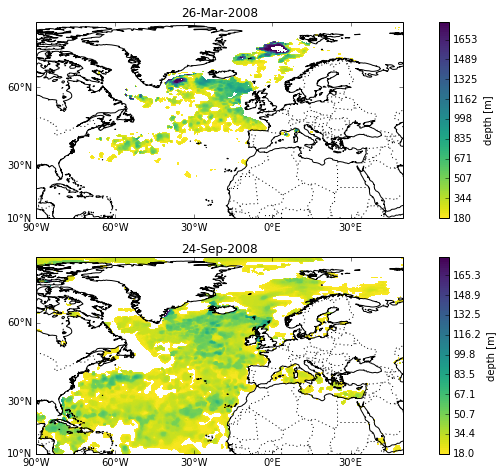

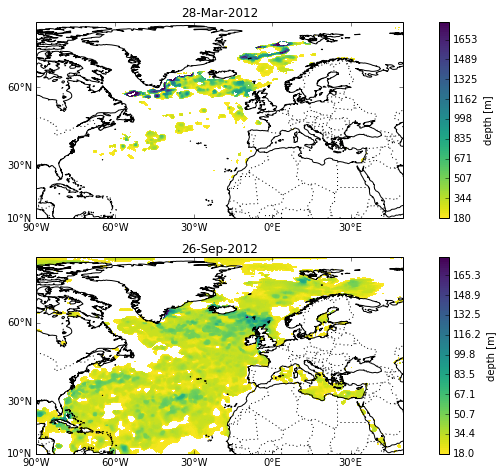

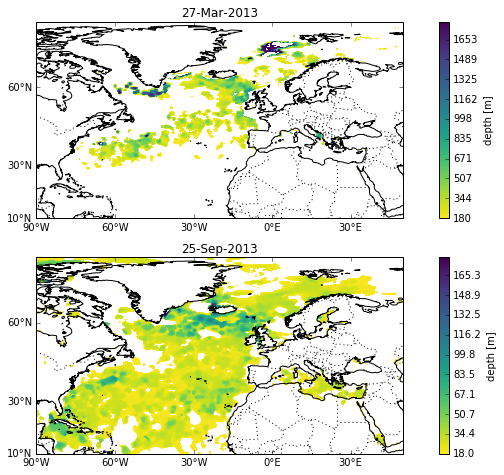

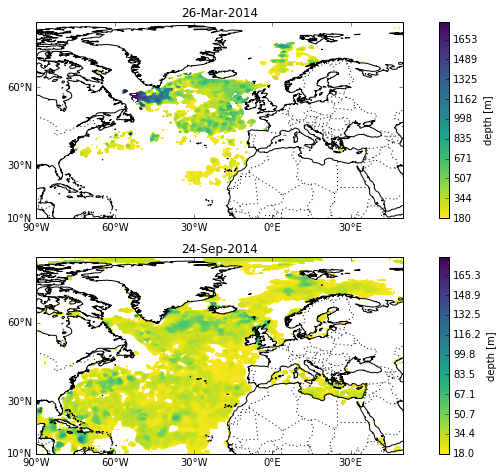

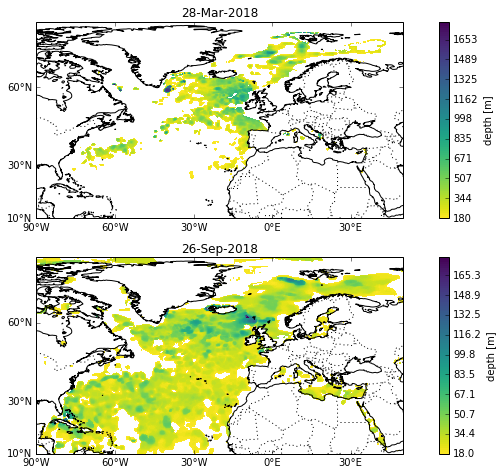

In [18]:
ys = [2007, 2008, 2012, 2013, 2014, 2018]

for year in ys:

    months = [3,7]
    Nrows = len(months)
    Ncols = 1

    print(year)
    f = str(year)
    d_set = xr.open_dataset(directory + file_name + f + ext, autoclose=True)
    mld = d_set.mlotst

    Plots_Series(mld, months, region, Nrows, Ncols, projection, color_bar)

In [10]:
ys = [2009, 2015]

for year in ys:

    months = [3,8]
    Nrows = len(months)
    Ncols = 1

    print(year)
    f = str(year)
    d_set = xr.open_dataset(directory + file_name + f + ext, autoclose=True)
    mld = d_set.mlotst

    Plots_Series(mld, months, region, Nrows, Ncols, projection, color_bar)

2009


NameError: name 'directory' is not defined

2010


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


<xarray.DataArray 'mlotst' (time: 10, latitude: 300, longitude: 560)>
[1680000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-03 2010-03-10 ... 2010-09-29
  * longitude  (longitude) float32 -89.875 -89.625 -89.375 ... 49.625 49.875
  * latitude   (latitude) float32 10.125 10.375 10.625 ... 84.375 84.625 84.875
Attributes:
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_theta
    long_name:      Mixed layer depth from density threshold equivalent to a ...
    units:          m
    unit_long:      meter

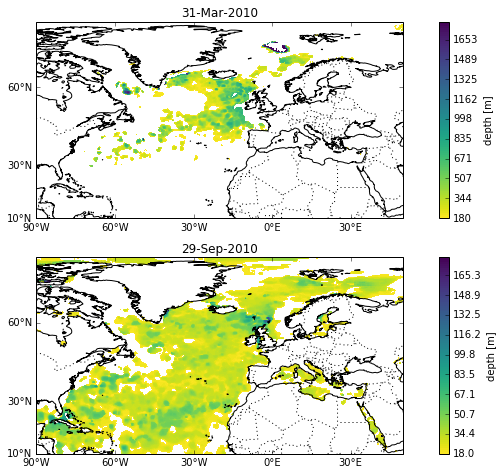

In [20]:
months = [4,9]
Nrows = len(months)
Ncols = 1

year = 2010

print(year)
f = str(year)
d_set = xr.open_dataset(directory + file_name + f + ext, autoclose=True)
mld = d_set.mlotst

Plots_Series(mld, months, region, Nrows, Ncols, projection, color_bar)



mld

In [21]:
##Projection and region to plot
projection = ccrs.PlateCarree(360)
region = [0, 20, 30, 60]    #Lon, Lat

d_set = xr.open_dataset(directory + file_name + f + ext, autoclose=True)
sis = d_set.sel(longitude=slice(0,20), latitude=slice(30,60)).mean()
print(sis)

Plots_Series(sis, months, region, Nrows, Ncols, projection, color_bar)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    mlotst   float64 29.57
    so       float64 36.77
    to       float64 13.87
    ugo      float64 0.007427
    vgo      float64 -0.0006502
    zo       float64 0.239


In [22]:
##### Ploting Anomalies


directory = '/home/lgarcia/Documents/data_ARMOR/'
file_name = 'MarSep_'
ext = '.nc'


data = xr.open_dataset(directory + file_name + yr + ext, autoclose=True)


projection = ccrs.PlateCarree(360)
region = [-90, 50, 10, 85]    #Lon, Lat

dates = [i for i in range(1,3,1)]
Nrows = len(dates)
Ncols = 1

Plots_Series(an, dates, region, Nrows, Ncols, projection, color_bar)


NameError: name 'yr' is not defined

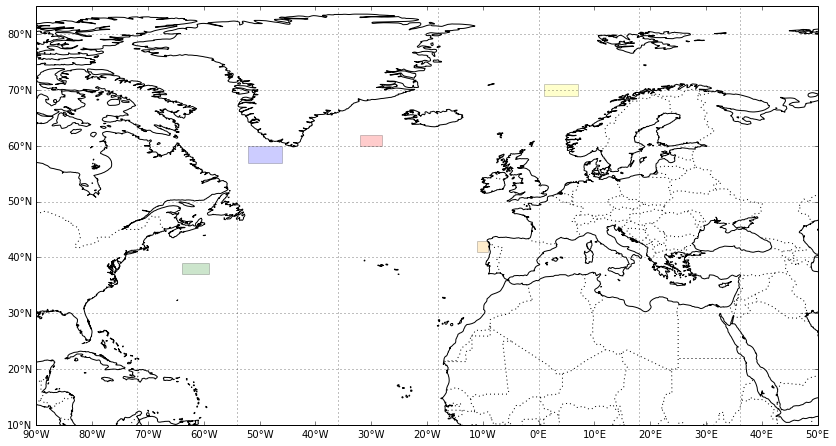

In [24]:
import matplotlib.patches as mpatches

projection = ccrs.PlateCarree(360)
region = [-90, 50, 10, 85]    #Lon, Lat

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection=projection), 
                        figsize=(15, 7.5))
ax.set_global()
ax.coastlines('50m')
ax.set_xticks([-90, -80, -70, -60, -50, -40, -30, -20, -10,
               0, 10, 20, 30, 40, 50, 60], crs=ccrs.PlateCarree())
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.set_extent(region, crs=ccrs.PlateCarree())     #lat, lon
ax.gridlines()

#Lab
ax.add_patch(mpatches.Rectangle(xy=[-52, 57], width=6, height=3,
                                    facecolor='blue',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )


#Irm
ax.add_patch(mpatches.Rectangle(xy=[-32, 60], width=4, height=2,
                                    facecolor='red',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )


#Gul
ax.add_patch(mpatches.Rectangle(xy=[-64, 37], width=5, height=2,
                                    facecolor='green',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )

#Nor
ax.add_patch(mpatches.Rectangle(xy=[1, 69], width=6, height=2,
                                    facecolor='yellow',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )

#NE
ax.add_patch(mpatches.Rectangle(xy=[-11, 41], width=2, height=2,
                                    facecolor='orange',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )

plt.savefig('Regions.pdf', bbox_inches='tight')